In [2]:
from geopy.geocoders import Nominatim
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd
import seaborn as sns
import folium
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
df= pd.read_csv("Dataset_de_200_Comunidades_para_Analise_Ambiental2.csv")

import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
from sklearn.preprocessing import StandardScaler

# Converter colunas Sim/Não para 1/0
df['Presença de Escola'] = df['Presença de Escola (Sim/Não)'].map({'Sim': 1, 'Não': 0})
df['Presença de Saúde'] = df['Presença de Unidade de Saúde (Sim/Não)'].map({'Sim': 1, 'Não': 0})

# Selecionar colunas numéricas para análise
colunas_numericas = [
    'Índice de Desmatamento (%)',
    'Acesso à Água Potável (%)',
    'Cobertura Vegetal (%)',
    'Renda Média Mensal (R$)',
    'Densidade Populacional (hab/km²)',
    'Frequência de Queimadas (ano)',
    'Distância de Área Urbana (km)',
    'Presença de Escola',
    'Presença de Saúde'
]

# Normalizar dados
scaler = StandardScaler()
df_normalizado = pd.DataFrame(scaler.fit_transform(df[colunas_numericas]), columns=colunas_numericas)

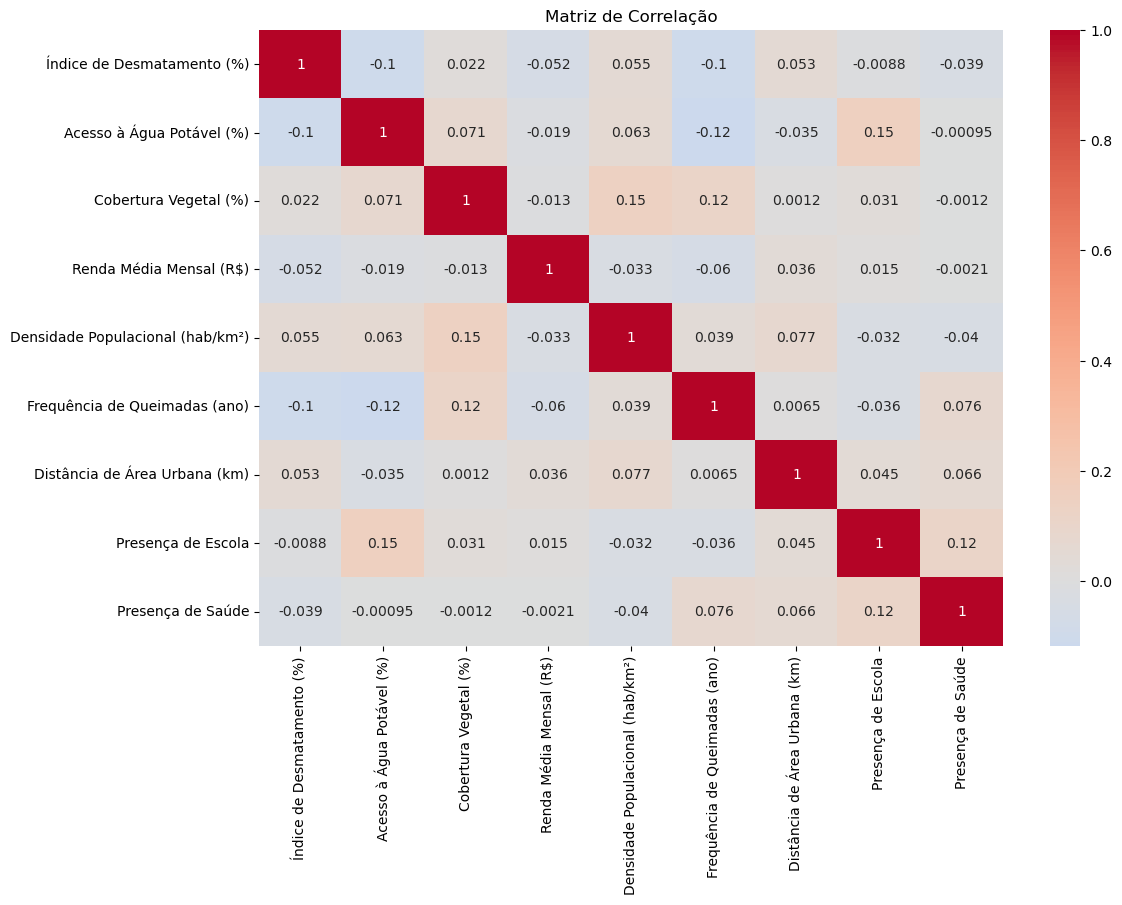

In [3]:
corr_matrix = df_normalizado.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()

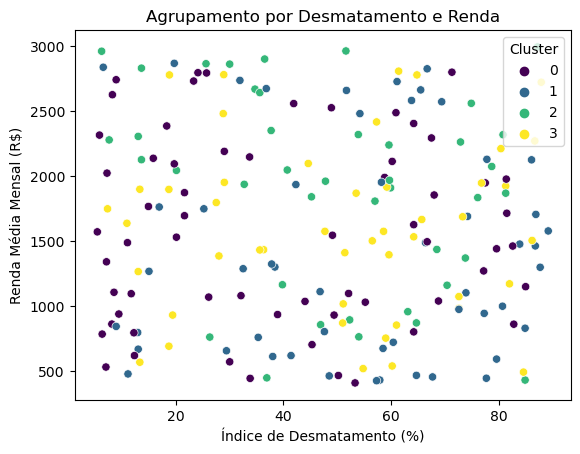

In [4]:
from sklearn.cluster import KMeans

# Definir número de clusters (teste com o método do cotovelo)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_normalizado)

# Visualizar clusters em 2D (ex: desmatamento vs. renda)
sns.scatterplot(data=df, x='Índice de Desmatamento (%)', y='Renda Média Mensal (R$)', hue='Cluster', palette='viridis')
plt.title('Agrupamento por Desmatamento e Renda')
plt.show()

In [16]:
print(df.groupby('Cluster')[colunas_numericas].mean())


         Índice de Desmatamento (%)  Acesso à Água Potável (%)  \
Cluster                                                          
0                         46.779832                  67.661345   
1                         48.775309                  67.702469   

         Cobertura Vegetal (%)  Renda Média Mensal (R$)  \
Cluster                                                   
0                    49.436975              1613.218487   
1                    49.492593              1616.456790   

         Densidade Populacional (hab/km²)  Frequência de Queimadas (ano)  \
Cluster                                                                    
0                               81.003361                       5.899160   
1                               84.623457                       5.333333   

         Distância de Área Urbana (km)  Presença de Escola  Presença de Saúde  
Cluster                                                                        
0                            51.5

In [19]:
import folium

mapa = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=5)

for _, row in df.iterrows():
    cor = 'green' if row['Cluster'] == 0 else 'orange' if row['Cluster'] == 1 else 'red'
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color=cor,
        fill=True,
        popup=f"Cluster: {row['Cluster']}<br>Distancia {row['Cobertura Vegetal (%)']:.2f}"
    ).add_to(mapa)

mapa